In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
from pykrx import stock
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

c:\Users\lunar\anaconda3\envs\py38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


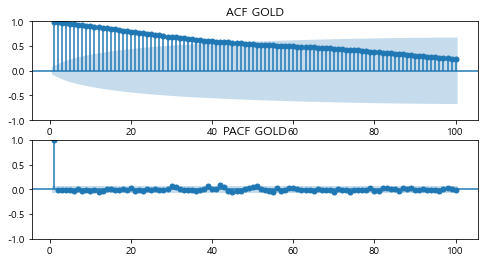

In [98]:
# ACF, PACF TEST
import statsmodels.graphics.tsaplots as sgt

gold = pd.read_csv('USGOLD.csv')
gold.index = [k for k in range(len(gold.index))]
gold_price = np.log(np.array(gold['종가']))

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sgt.plot_acf(gold_price, lags=100, zero=False, ax=ax1)
ax1.set_title('ACF GOLD')

sgt.plot_pacf(gold_price, lags=100, zero=False, ax=ax2)
ax2.set_title('PACF GOLD')

plt.show()

In [99]:
from statsmodels.tsa.stattools import adfuller

def adf_test(array):
    result = adfuller(array)
    print('ADF Statistics: %f'%result[0])
    print('p-value: %f'%result[1])
    print('Critical values')
    for key, value in result[4].items():
        print('\t%s: %.3f'%(key, value))


adf_test(gold['종가'])
print('----------------------')

ADF Statistics: -0.348902
p-value: 0.918287
Critical values
	1%: -3.441
	5%: -2.866
	10%: -2.569
----------------------


In [100]:
def local_normalization(array, size=82):
    data = []
    iteration = len(array) - size + 1
    for i in range(0,iteration):
        tmp = array[i:size+i]
        mean = np.mean(tmp)
        sd = np.std(tmp)
        data.append((array[size+i-1]-mean)/sd)
    return np.array(data)

c:\Users\lunar\anaconda3\envs\py38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


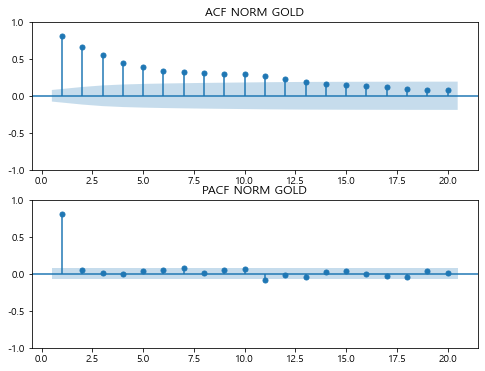

In [101]:
norm_gold = local_normalization(np.array(gold['종가']), 10)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sgt.plot_acf(norm_gold, lags=20, zero=False, ax=ax1)
ax1.set_title('ACF NORM GOLD')

sgt.plot_pacf(norm_gold, lags=20, zero=False, ax=ax2)
ax2.set_title('PACF NORM GOLD')

plt.show()

Text(0.5, 1.0, 'SD')

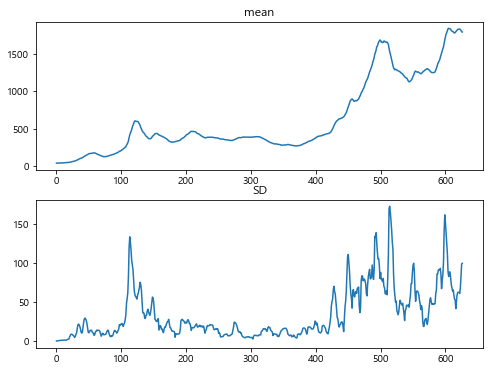

In [102]:
def mean_sd(array, size=82):
    m = []
    s = []
    iteration = len(array) - size + 1
    for i in range(iteration):
        tmp = array[i:size+i]
        mean = np.mean(tmp)
        sd = np.std(tmp)
        m.append(mean)
        s.append(sd)

    return np.array([np.array(m), np.array(s)])


fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(mean_sd(np.array(gold['종가']), 10)[0])
plt.title('mean')

plt.subplot(2,1,2)
plt.plot(mean_sd(np.array(gold['종가']), 10)[1])
plt.title('SD')

636 627


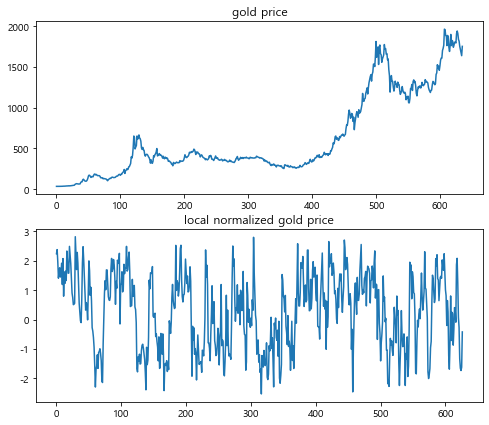

In [103]:
fig = plt.figure(figsize=(8,7))

plt.subplot(2,1,1)
plt.plot(gold['종가'])
plt.title('gold price')

plt.subplot(2,1,2)
plt.plot(norm_gold)
plt.title('local normalized gold price')

print(len(gold), len(norm_gold))

In [104]:
colm = ['A','B','C','D','E','F','G','H','I','J','K']
m = pd.read_csv('macro.csv')
macro = m[colm]

norm_macro = []
for i in range(len(colm)):
    norm_macro.append(local_normalization(macro[colm[i]],size=10))

norm_macro = pd.DataFrame(norm_macro).T
norm_macro.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.966228,1.308238,-1.435664,-1.146868,1.527144,-0.057296,2.817057e-02,9.251460e-01,-1.989080,-1.391252,1.602064
1,-1.023222,1.555556,-0.940410,-1.017047,1.821221,0.651298,5.328074e-01,2.994049e-15,-1.938476,-1.041525,1.834805
2,-0.428339,1.806238,-0.191142,-0.677674,2.031881,1.365154,8.919530e-01,-1.597191e+00,-0.570728,-0.673719,1.531214
3,0.080391,1.835165,0.582170,-0.101144,1.365002,1.721996,4.609950e-15,-1.043030e+00,-0.611148,-0.236030,1.642120
4,-0.097222,1.842627,0.109645,2.559376,1.528572,1.938105,-2.526736e+00,-6.201737e-01,-1.012446,0.346371,1.591271


In [220]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

colm = ['A','B','C','D','E','F','G','H','I','J','K']
def date_range(start, end):
    start = datetime.strptime(start, '%Y-%m')
    end = datetime.strptime(end, '%Y-%m')
    diff = (end.year - start.year) * 12 + end.month - start.month
    dates = [(start + relativedelta(months=i)).strftime("%Y-%m") for i in range(diff+1)]
    return dates

dates = date_range('1988-02', '2022-11')

data = pd.concat([norm_macro, pd.DataFrame(norm_gold[209:])], axis=1)
print(len(data.index), len(dates))

colm.append('label')
data.index = dates
data.columns = np.array(colm)

418 418


In [221]:
train_set, test_set = data.iloc[:350], data.iloc[350:]

test_set.head()

,A,B,C,D,E,F,G,H,I,J,K,label
2017-04,0.524606,1.780835,0.585624,0.076923,1.651472,0.950637,0.029059,-2.005223,0.650297,1.233377,1.432118,0.193947
2017-05,0.297086,1.531741,0.431659,0.500000,1.056076,1.421403,-0.459466,-1.570717,-0.010131,1.125429,1.217883,0.361393
2017-06,-0.652890,1.374357,-0.084639,2.315231,1.109740,1.556231,-1.479591,-0.228193,-1.194623,1.115010,1.364686,0.033114
2017-07,-0.889470,1.030208,0.179137,2.076584,1.258464,0.509120,-0.947902,0.168073,-0.662074,1.207478,1.305034,0.793924
2017-08,-1.640371,1.273660,-1.003901,0.459639,1.471073,0.695540,-1.413938,-0.102240,0.272105,1.490356,1.425704,1.584975


In [247]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(22,1,12)),
    tf.keras.layers.Conv2D(12,(2,1), activation='relu', input_shape=(22,1,12)),
    tf.keras.layers.MaxPool2D(pool_size=(2,1)),
    tf.keras.layers.Conv2D(12,(2,1), activation='relu', input_shape=(22,1,12)),
    tf.keras.layers.MaxPool2D(pool_size=(2,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Reshape((4,12)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

model.summary()

model.compile('adam', loss='MeanSquaredError', metrics=['accuracy'])

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 21, 1, 12)         300       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 10, 1, 12)        0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 9, 1, 12)          300       
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 4, 1, 12)         0         
 ng2D)                                                           
                                                                 
 flatten_58 (Flatten)        (None, 48)                0         
                                                                 
 reshape_36 (Reshape)        (None, 4, 12)           

In [223]:
def gen_train_xy(df):
    train_x = []
    df.fillna(1)
    for i in range(len(df.index)-21):
        tmp = []
        for k in range(22):
            tmp.append(np.array(df.iloc[i+k]).tolist())
        train_x.append(tmp)
    
    train_y = np.array(df['label'][21:])
    return np.array(train_x).reshape(-1,22,1,12), train_y

X, Y = gen_train_xy(train_set)
test_x, test_y = gen_train_xy(test_set)

In [224]:
print(X[-1][-1])
print(train_set.iloc[-1])

[[ 1.13173446  1.79040911  1.18056609  0.27668579  1.70726742 -0.00526874
   0.73269966 -0.88640526  0.57873161  1.41581193  1.58827637 -0.2483059 ]]
A        1.131734
B        1.790409
C        1.180566
D        0.276686
E        1.707267
F       -0.005269
G        0.732700
H       -0.886405
I        0.578732
J        1.415812
K        1.588276
label   -0.248306
Name: 2017-03, dtype: float64


In [248]:
model.fit(X, Y, batch_size=50, epochs=400, validation_data=[test_x, test_y])

Epoch 1/400
7/7 [==============================] - 8s 248ms/step - loss: 1.4544 - accuracy: 0.0000e+00 - val_loss: 1.5874 - val_accuracy: 0.0000e+00
Epoch 2/400
7/7 [==============================] - 0s 12ms/step - loss: 1.3291 - accuracy: 0.0000e+00 - val_loss: 1.5667 - val_accuracy: 0.0000e+00
Epoch 3/400
7/7 [==============================] - 0s 11ms/step - loss: 1.2262 - accuracy: 0.0000e+00 - val_loss: 1.5481 - val_accuracy: 0.0000e+00
Epoch 4/400
7/7 [==============================] - 0s 11ms/step - loss: 1.1523 - accuracy: 0.0000e+00 - val_loss: 1.5370 - val_accuracy: 0.0000e+00
Epoch 5/400
7/7 [==============================] - 0s 11ms/step - loss: 1.0659 - accuracy: 0.0000e+00 - val_loss: 1.5133 - val_accuracy: 0.0000e+00
Epoch 6/400
7/7 [==============================] - 0s 11ms/step - loss: 1.0017 - accuracy: 0.0000e+00 - val_loss: 1.4931 - val_accuracy: 0.0000e+00
Epoch 7/400
7/7 [==============================] - 0s 11ms/step - loss: 0.9307 - accuracy: 0.0000e+00 - val_los

In [249]:
ta = model.predict(test_x)

In [250]:
ba = model.predict(X)

In [251]:
test_df = pd.DataFrame({
    'predict':np.squeeze(ta, axis=1),
    'real':test_y
})

<AxesSubplot:>

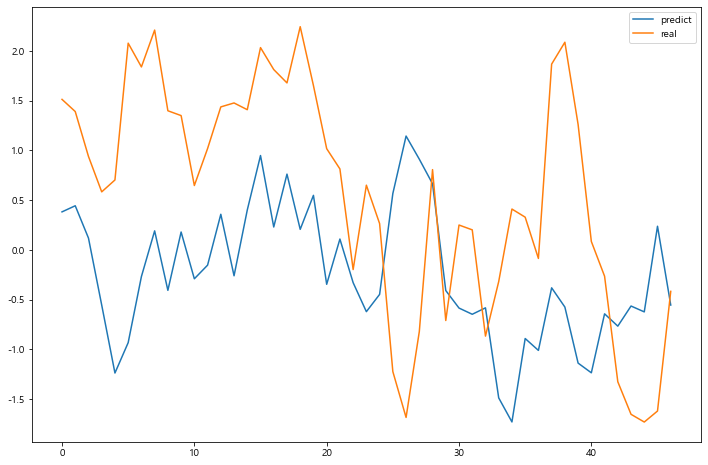

In [252]:
test_df.plot(figsize=(12,8))

<AxesSubplot:>

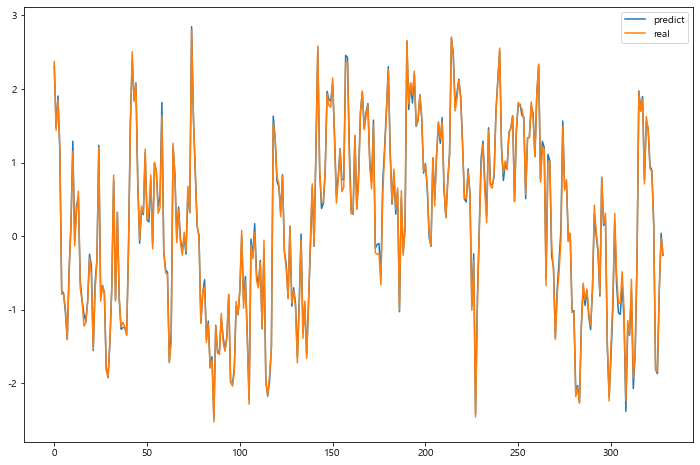

In [253]:
train_df = pd.DataFrame({
    'predict':np.squeeze(ba, axis=1),
    'real':Y
})

train_df.plot(figsize=(12,8))